<a href="https://www.kaggle.com/code/viniciusluizfranca/house-prices-rmse-25935-74?scriptVersionId=116308623" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
def get_df():
    df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
    df_test  = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
    return df, df_test

In [3]:
def get_dtypes(df):
    feat_cat = df.select_dtypes(include = object).columns
    feat_num = df.select_dtypes(exclude = object).columns
    return feat_cat, feat_num

In [4]:
pd.set_option('display.max_columns', None)

df, df_test = get_df()
df.shape, df_test.shape

((1460, 81), (1459, 80))

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1 - EDA
- **53% categorical features**
- **Counting null values**
    - **PoolQC:**  1453 (99%)
    - **MiscFeature:** 1406 (96%)
    - **Alley:** 1369 (94%)
    - **Fence:** 1179 (81%)
    - **FireplaceQu:**     690 (47%)
    - **LotFrontage:**     259 (18%)
- **32 of 48 categorical features have low data variance**
    - **MSZoning:** RL (79%)
    - **Street** Pave (99%)
    - **LotShape**: Reg (63%)
    - **LandContour**: Lvl (90%)
    - **Utilities**: AllPub (99,9%)
    - **LotConfig**: Inside (72%)
    - **LandSlope**: Gtl (95%)
    - **Condition1**: Norm (88%)
    - **Condition2**: Norm (99%)
    - **BldgType**: 1Fam (84%)
    - **HouseStyle**: 1Story (50%)
    - **RoofStyle**: Gable (78%)
    - **RoofMatl**: CompShg (98%)
    - **ExterQual**: TA (62%)
    - **ExterCond**: TA (88%)
    - **BsmtCond**: TA (92%)
    - **BsmtExposure**: No (64%)
    - **BsmtFinType2**: Unf (89%)
    - **Heating**: GasA (98%)
    - **HeatingQC**: Ex (51%)
    - **CentralAir**: Y (93%)
    - **Electrical**: SBrkr (91%)
    - **KitchenQual**: TA (50%)
    - **Functional**: Typ (93%)
    - **GarageType**: Attchd (63%)
    - **GarageQual**: TA (95%)
    - **GarageCond**: TA (96%)
    - **PavedDrive**: Y (91%)
    - **PavedDrive**: MnPrv (56%)
    - **MiscFeature**: Shed (90%)
    - **SaleType** WD (88%)
    - **SaleCondition** Normal (92%)
- **16 of 38 numerical features have many outliers**
    - LotArea
    - BsmtFinSF2
    - BsmtUnfSF
    - TotalBsmtSF
    - 1stFlrSF
    - LowQualFinSF
    - GrLivArea
    - GarageArea
    - WoodDeckSF
    - OpenPorchSF
    - EnclosedPorch
    - 3SsnPorch
    - ScreenPorch
    - PoolArea
    - MiscVal
    - SalePrice **(target)**
- **Features correlated with the target**
    - OverallQual *(Classifica o material geral e o acabamento da casa)* (79%)
    - GrLivArea *(Área de estar acima do nível (chão) pés quadrados)* (71%)
    - GarageCars *(Tamanho da garagem em capacidade de carro)* (64%)
    - GarageArea *(Tamanho da garagem em metros quadrados)* (62%)
    - TotalBsmtSF *(Total de metros quadrados de área do porão)* (61%) 
    - 1stFlrSF *(Pés quadrados do primeiro andar)* (61%)

In [6]:
# Imports
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Get categorical and numerics features
feat_cat, feat_num = get_dtypes(df)
feat_cat, feat_num

(Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'),
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 

In [8]:
print(f'{feat_cat.shape[0]} categorical features\n{feat_num.shape[0]} numerical features (target is included)')

43 categorical features
38 numerical features (target is included)


In [9]:
# Counting Null Values
null_sum = df.isnull().sum()
null_sum[null_sum > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Unique categorical values
unique_values = dict()
for f in feat_cat:
    print(df[f].value_counts().head())
    print('-'*50)
    
    unique_values[f] = list( df[f].unique() )

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
--------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------------------------------

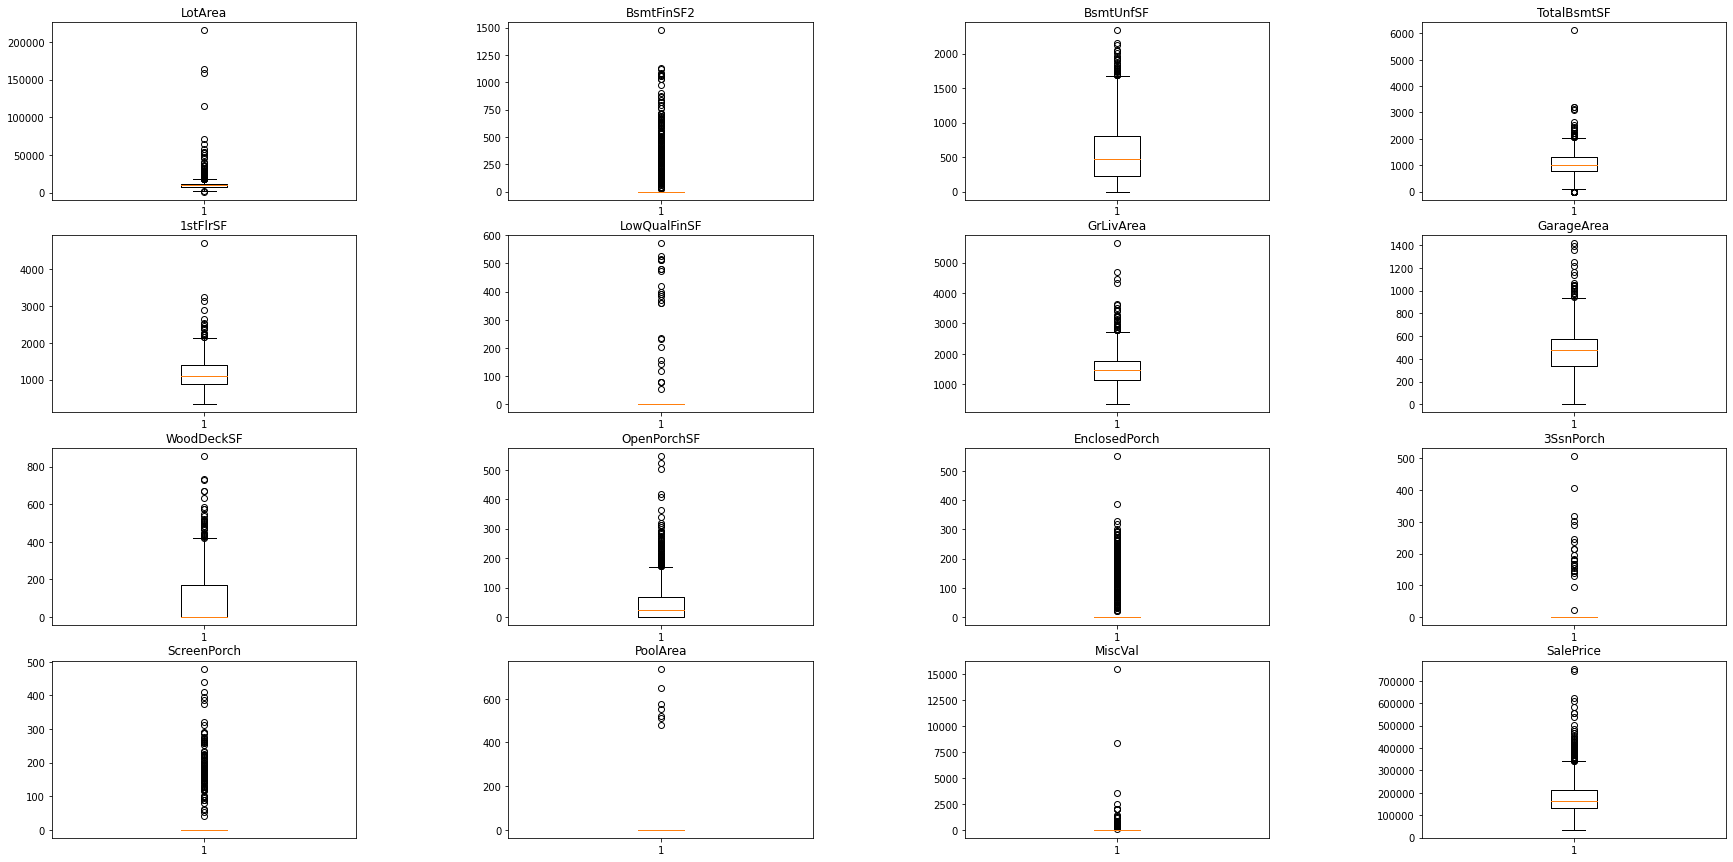

In [11]:
# Numerical features with many outliers | Atributos numéricos com muitos outliers
features_outliers = ['LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF','GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
# Outliers
rows, columns = 4, 4
fig, axes = plt.subplots(rows, columns, figsize=(30, 15))
axes = axes.ravel()
for i in range(rows*columns):
    column = features_outliers[i]
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
plt.subplots_adjust(wspace = 0.5)

In [12]:
areaFeatures = ['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea']

In [13]:
# Data Multicollinearity - Area features
vif = pd.DataFrame()
vif['areaFeatures'] = areaFeatures
vif["VIF"] = [variance_inflation_factor(df[areaFeatures].dropna(axis=0).values, i) for i in range(len(areaFeatures))]
vif

,areaFeatures,VIF
0,LotArea,2.262669
1,MasVnrArea,1.550855
2,GrLivArea,7.826119
3,GarageArea,7.118721
4,PoolArea,1.019995


In [14]:
SFFeatures = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'LowQualFinSF']
SFFeatures2 = ['1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'LowQualFinSF']
SFFeatures3 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF']

In [15]:
df[SFFeatures2].head()

,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,LowQualFinSF
0,856,854,0,61,0
1,1262,0,298,0,0
2,920,866,0,42,0
3,961,756,0,35,0
4,1145,1053,192,84,0


In [16]:
df[SFFeatures3].tail()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF
1455,0,0,953,953,0
1456,790,163,589,1542,0
1457,275,0,877,1152,0
1458,49,1029,0,1078,0
1459,830,290,136,1256,0


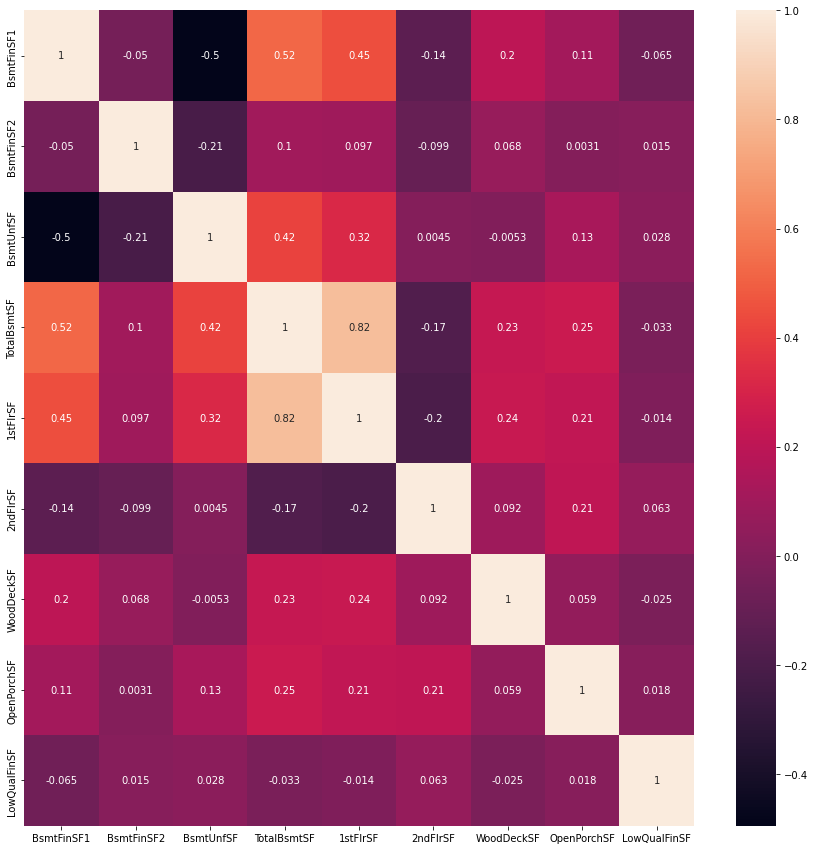

In [17]:
# Data correlation - Squared Feet
fig = plt.figure(figsize = (15, 15))
sns.heatmap(df[SFFeatures].corr(), annot = True);

In [18]:
# Data Multicollinearity - Squared Feet
vif = pd.DataFrame()
vif['SFFeatures'] = SFFeatures
vif["VIF"] = [variance_inflation_factor(df[SFFeatures].dropna(axis=0).values, i) for i in range(len(SFFeatures))]
vif

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,SFFeatures,VIF
0,BsmtFinSF1,inf
1,BsmtFinSF2,inf
2,BsmtUnfSF,inf
3,TotalBsmtSF,inf
4,1stFlrSF,21.560665
5,2ndFlrSF,1.584716
6,WoodDeckSF,1.732686
7,OpenPorchSF,1.704983
8,LowQualFinSF,1.023620


In [19]:
porchFeatures = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [20]:
df[porchFeatures].head()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,61,0,0,0
1,0,0,0,0
2,42,0,0,0
3,35,272,0,0
4,84,0,0,0


In [21]:
garageFeatures = ['GarageYrBlt', 'GarageCars', 'GarageArea']

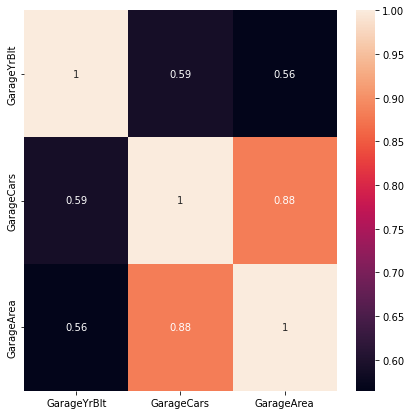

In [22]:
# Data correlation - garage numerical features
fig = plt.figure(figsize = (7, 7))
sns.heatmap(df[garageFeatures].corr(), annot = True);

In [23]:
# Data Multicollinearity - garage numerical features
vif = pd.DataFrame()
vif['garageFeatures'] = garageFeatures
vif["VIF"] = [variance_inflation_factor(df[garageFeatures].dropna(axis=0).values, i) for i in range(len(garageFeatures))]
vif

,garageFeatures,VIF
0,GarageYrBlt,10.448814
1,GarageCars,32.055481
2,GarageArea,26.860864


In [24]:
bathFeatures = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [25]:
df[bathFeatures].head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,0,2,1
1,0,1,2,0
2,1,0,2,1
3,1,0,1,0
4,1,0,2,1


In [26]:
qualFeatures = ['LotArea', 'OverallQual', 'OverallCond', 'SalePrice']

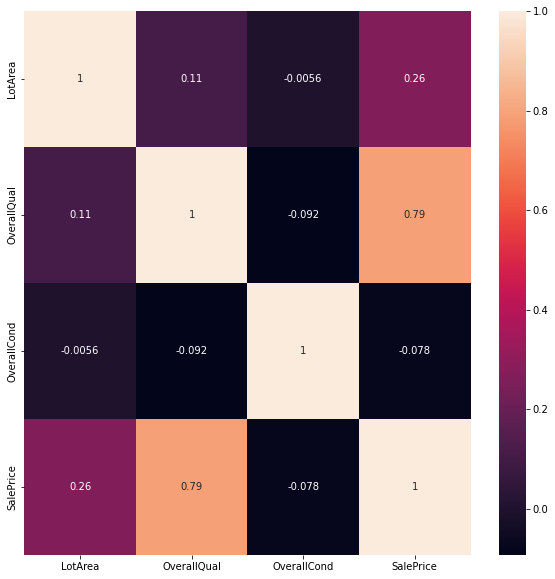

In [27]:
# Data correlation - bathroom features
fig = plt.figure(figsize = (10, 10))
sns.heatmap(df[qualFeatures].corr(), annot = True);

In [28]:
df[qualFeatures].describe()

,LotArea,OverallQual,OverallCond,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,180921.195890
std,9981.264932,1.382997,1.112799,79442.502883
min,1300.000000,1.000000,1.000000,34900.000000
25%,7553.500000,5.000000,5.000000,129975.000000
50%,9478.500000,6.000000,5.000000,163000.000000
75%,11601.500000,7.000000,6.000000,214000.000000
max,215245.000000,10.000000,9.000000,755000.000000


In [29]:
# Grouped Transform | MedNhbdOvr that describes the median of OverallQual grouped on Neighborhood
MedNhbdOvr = df.groupby(by=['Neighborhood']).median()['OverallQual']
MedNhbdOvr

Neighborhood
Blmngtn    7.0
Blueste    6.0
BrDale     6.0
BrkSide    5.0
ClearCr    6.0
CollgCr    7.0
Crawfor    6.0
Edwards    5.0
Gilbert    7.0
IDOTRR     5.0
MeadowV    4.0
Mitchel    5.0
NAmes      5.0
NPkVill    6.0
NWAmes     6.0
NoRidge    8.0
NridgHt    8.0
OldTown    5.0
SWISU      6.0
Sawyer     5.0
SawyerW    6.0
Somerst    7.0
StoneBr    8.0
Timber     7.5
Veenker    6.0
Name: OverallQual, dtype: float64

In [30]:
def lmplot(feature_num,feature_cat, target = 'SalePrice'):
    # The trend lines being significantly different from one category to the next indicates an interaction effect.
    sns.lmplot(
    x=feature_num, y=target, hue=feature_cat, col=feature_cat,
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4
    );

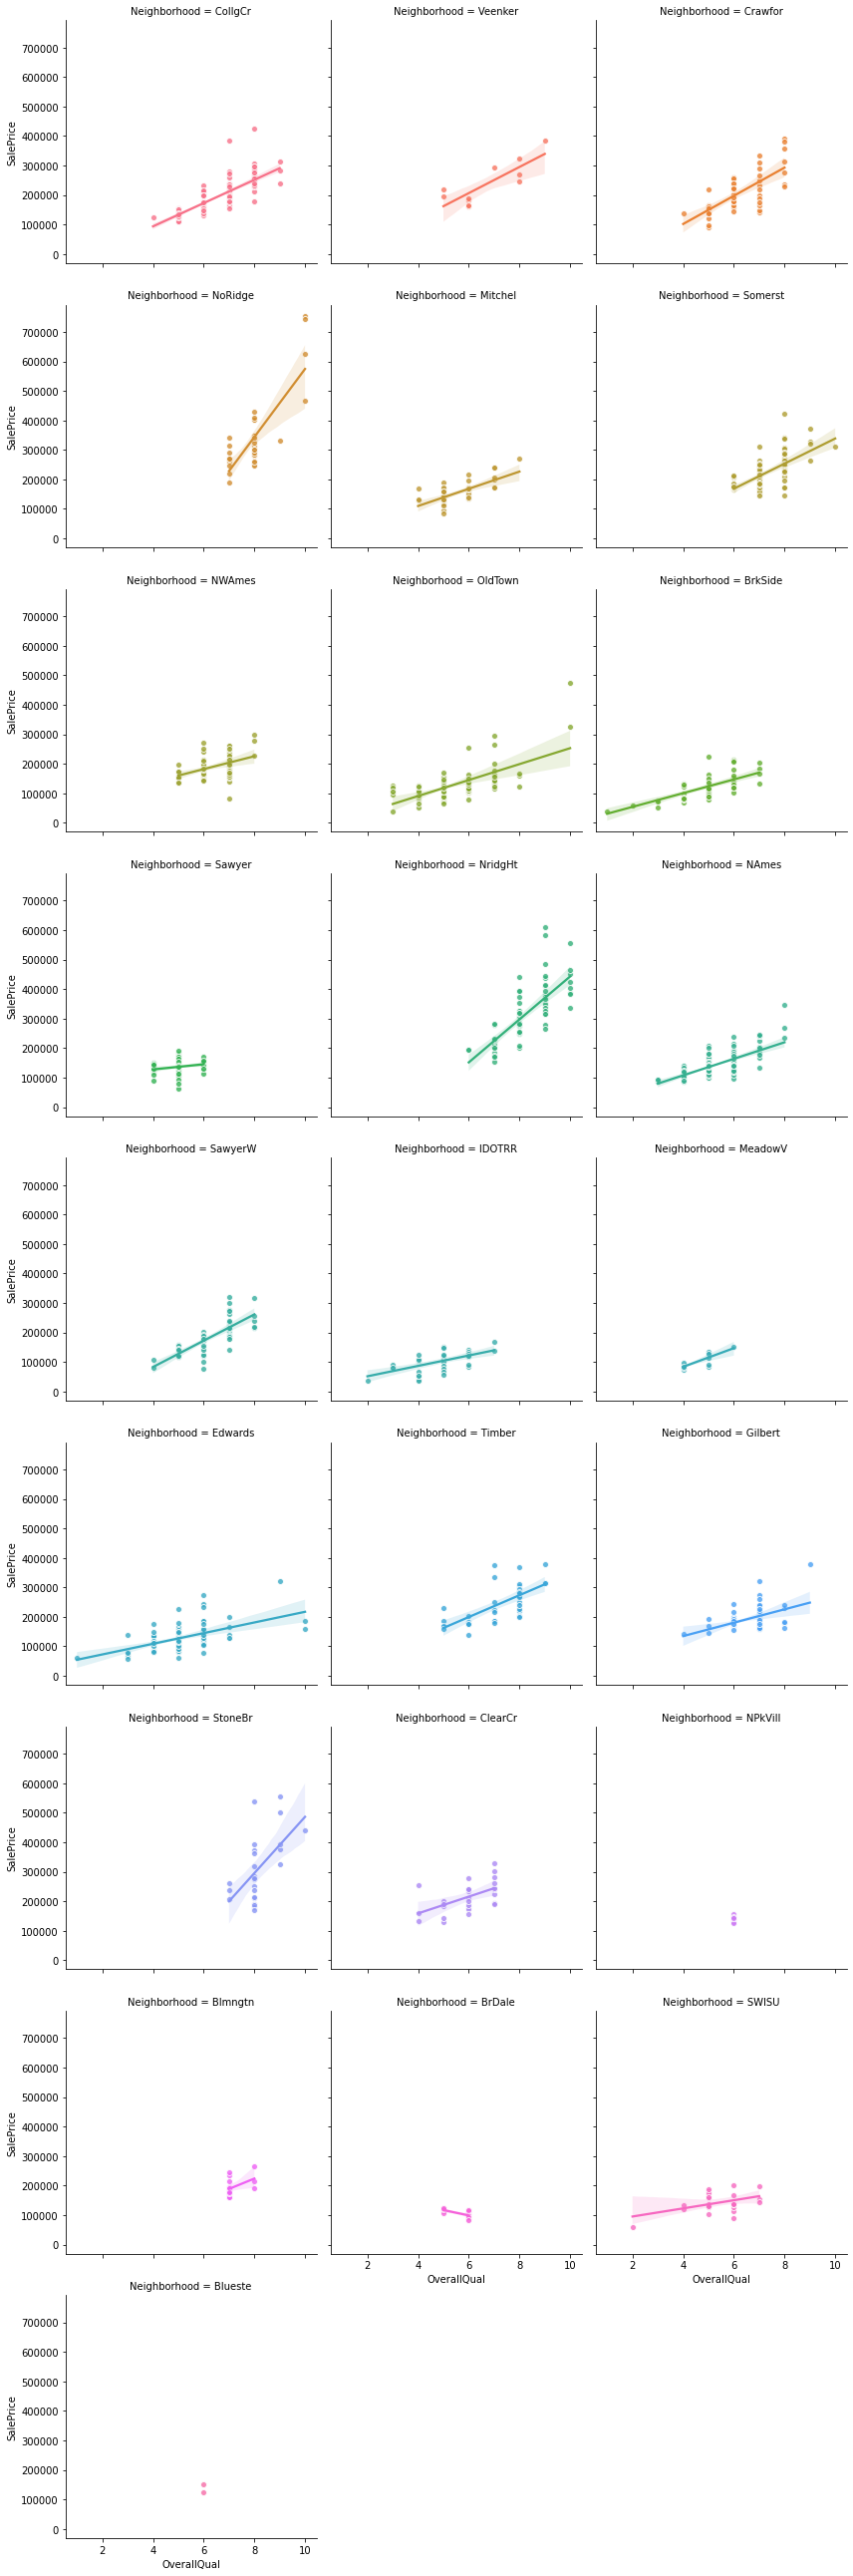

In [31]:
feature_num = "OverallQual"
target = 'SalePrice'
feature_cat = 'Neighborhood'

lmplot(feature_num, feature_cat, target)

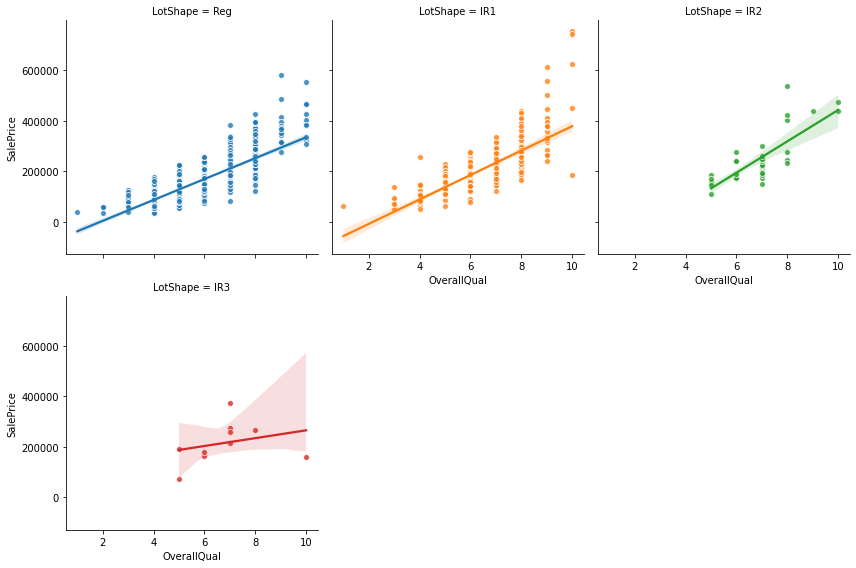

In [32]:
feature_num = "OverallQual"
target = 'SalePrice'
feature_cat = 'LotShape'

lmplot(feature_num, feature_cat, target)

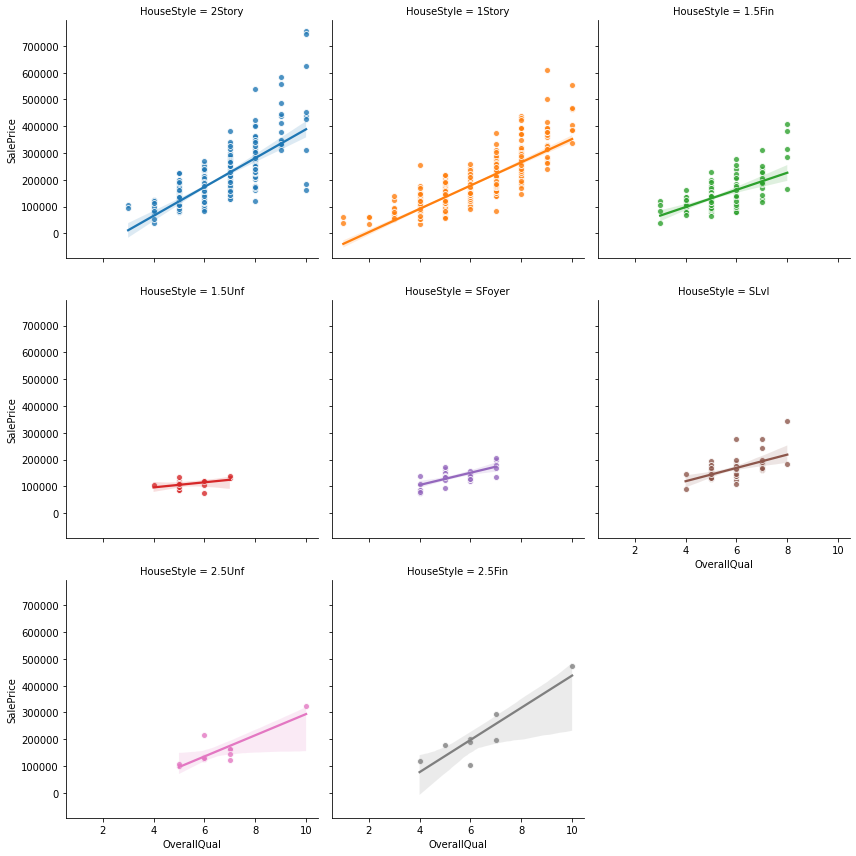

In [33]:
feature_num = "OverallQual"
target = 'SalePrice'
feature_cat = 'HouseStyle'

lmplot(feature_num, feature_cat, target)

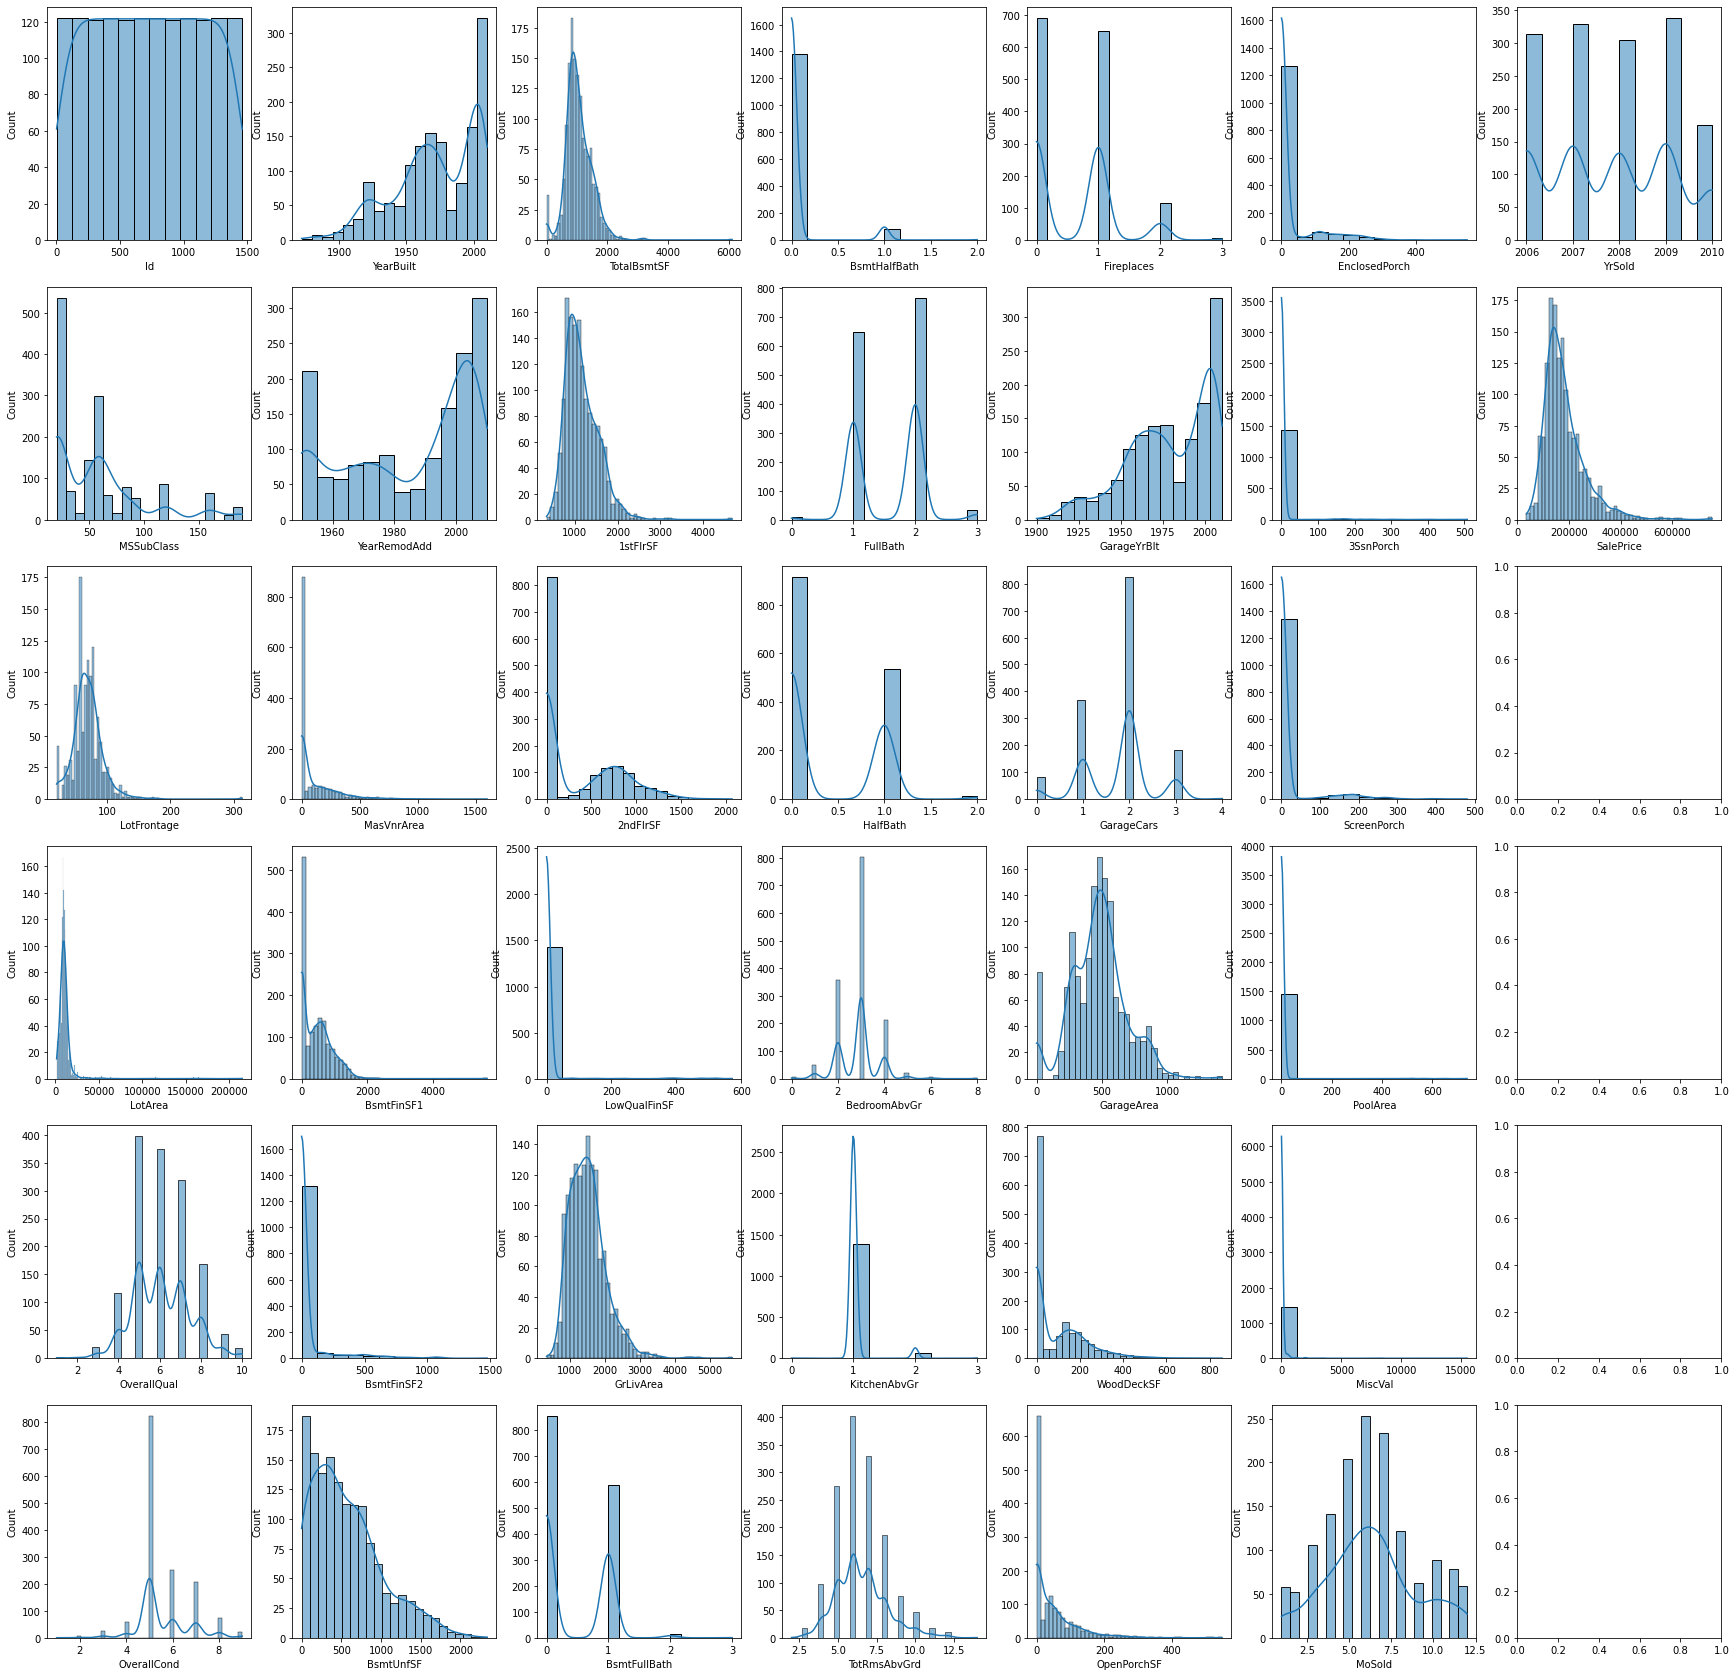

In [34]:
# Data distribution

f, axes = plt.subplots(6, 7, figsize=(30, 30))

ln, col = 0, 0
for i in range(len(feat_num)):
    sns.histplot(df[feat_num[i]], kde=True, ax=axes[ln][col]);
    if (ln+1)%6 == 0:
        col += 1
        ln   = 0
    else:
        ln += 1

# 2 - Data Pre-processing

In [35]:
# Imports
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from category_encoders.glmm import GLMMEncoder
from category_encoders.m_estimate import MEstimateEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose  import ColumnTransformer

In [36]:
%%capture
!pip install pyod
from pyod.models.knn import KNN

In [37]:
outliers_idx = [184, 547, 629, 861, 1285]

In [38]:
def clean_columns_df():
    # Remove columns with many null values
    many_nan_columns     = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

    # Remove columns with low variance (>70%)
    low_variance_columns = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1'
                            ,'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond'
                            , 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional'
                            , 'GarageQual', 'GarageCond', 'SaleType', 'MiscFeature', 'SaleCondition']
    
    # Remove columns with infinity multicollinearity with TotalBsmtSF
    bsmtMulticol = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
    
    # Remove summed columns in TotalArea
    TotalAreaSummed = ['LotArea', 'GarageArea', 'PoolArea']
    
    # Removed summed columns in TotalSF
    TotalSFSummed = ['1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']
    
    # Removed summed columns in TotalPorch and PorchTypes
    TotalPorchSummed = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
    
    # Removed summed columns in TotalBath
    TotalBathSummed = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
    
    # Removed grouped columns
    GroupedColumns = ['Neighborhood', 'HouseStyle', 'LotShape']

    removed_columns = list(set(many_nan_columns + low_variance_columns +
                               bsmtMulticol + TotalAreaSummed +
                               TotalSFSummed + TotalPorchSummed + 
                               TotalBathSummed + GroupedColumns))
    return removed_columns   

In [39]:
def clean_rows_df(df):
    # Removing rows with more than 10 columns with null values
    removed_rows = list()
    for i, values in df.isnull().iterrows():
        if values.sum() >= 11:
            removed_rows.append(i)
    
    return removed_rows

In [40]:
def create_columns(df):
    df_copy = df.copy()
    df_copy['TotalArea']  = df_copy['LotArea'] + df_copy['GarageArea'] + df_copy['PoolArea']
    df_copy['TotalSF']    = df_copy['1stFlrSF'] + df_copy['2ndFlrSF'] + df_copy['WoodDeckSF'] + df_copy['OpenPorchSF']
    df_copy['TotalBath']  = df_copy['BsmtFullBath'] + df_copy['BsmtHalfBath'] + df_copy['FullBath'] + df_copy['HalfBath'] 
    df_copy['TotalPorch'] = df_copy['OpenPorchSF'] + df_copy['EnclosedPorch'] + df_copy['3SsnPorch'] + df_copy['ScreenPorch']
    
    df_copy['OpenPorchSF_COUNT']   = np.where(df_copy['OpenPorchSF'] == 0, df_copy['OpenPorchSF'], 1)
    df_copy['EnclosedPorch_COUNT'] = np.where(df_copy['EnclosedPorch'] == 0, df_copy['EnclosedPorch'], 1)
    df_copy['3SsnPorch_COUNT']     = np.where(df_copy['3SsnPorch'] == 0, df_copy['3SsnPorch'], 1)
    df_copy['ScreenPorch_COUNT']   = np.where(df_copy['ScreenPorch'] == 0, df_copy['ScreenPorch'], 1)
    df_copy['PorchTypes'] = df_copy['OpenPorchSF_COUNT'] + df_copy['EnclosedPorch_COUNT'] + df_copy['3SsnPorch_COUNT'] + df_copy['ScreenPorch']
    
    MedNhbdOvr        = df_copy.groupby(by=['Neighborhood']).median()['OverallQual']
    MedNhbdOvr_values = list()
    for v in df_copy['Neighborhood']:
        MedNhbdOvr_values.append(MedNhbdOvr[v])
    df_copy['MedNhbdOvr'] = MedNhbdOvr_values
    
    MedHStyOvr        = df_copy.groupby(by=['HouseStyle']).median()['OverallQual']
    MedHStyOvr_values = list()
    for v in df_copy['HouseStyle']:
        MedHStyOvr_values.append(MedHStyOvr[v])
    df_copy['MedHStyOvr'] = MedHStyOvr_values
    
    MedLotAOvr        = df_copy.groupby(by=['LotShape']).median()['OverallQual']
    MedLotAOvr_values = list()
    for v in df_copy['LotShape']:
        MedLotAOvr_values.append(MedLotAOvr[v])
    df_copy['MedLotAOvr'] = MedLotAOvr_values
    
    return df_copy[['TotalArea', 'TotalSF', 'TotalPorch', 'TotalBath', 'PorchTypes', 'MedNhbdOvr', 'MedHStyOvr', 'MedLotAOvr']]

In [41]:
def numeric_2_categorical(df):
    df_copy = df.copy()
    
    df_copy['MSSubClass'] = df_copy['MSSubClass'].apply(str)

    df_copy['OverallCond'] = df_copy['OverallCond'].astype(str)
    
    df_copy['YearBuilt'] = df_copy['YearBuilt'].apply(str)
    
    df_copy['YrSold'] = df_copy['YrSold'].apply(str) #
    
    df_copy['MoSold'] = df_copy['MoSold'].astype(str) #
    
    return df_copy

In [42]:
def get_train_test_split(df, df_test):  
    df_new, df_test_new = create_columns(df), create_columns(df_test)
    
    df = pd.concat([df, df_new], axis = 1)
    df_test = pd.concat([df_test, df_test_new], axis = 1)
    
    df, df_test = numeric_2_categorical(df), numeric_2_categorical(df_test)
    
    removed_columns = clean_columns_df()
    removed_rows    = clean_rows_df(df)
    
    df.drop(removed_rows, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    df.drop(removed_columns, inplace = True, axis = 1)
    df_test.drop(removed_columns,  inplace = True, axis = 1)
    
    # Split features and target
    X_train, y_train = df.drop(['SalePrice', 'Id'], axis = 1), df['SalePrice']
    X_test = df_test.drop(['Id'], axis = 1)
    
    # Remove outliers - Step 3
    X_train.drop(index = outliers_idx, inplace = True)
    
    y_train.drop(index = outliers_idx, inplace = True)
    
    return X_train, X_test, y_train

In [43]:
def get_not_removed_columns(columns):
    removed_columns = clean_columns_df()
    return [column for column in columns if column not in removed_columns]

In [44]:
df, df_test = get_df()

X_train, X_test, y_train = get_train_test_split(df, df_test)
X_train.shape, y_train.shape, X_test.shape

((1441, 39), (1441,), (1459, 39))

In [45]:
# Get categorical and numerics features
feat_cat, feat_num = get_dtypes(X_train)
feat_cat, feat_num

(Index(['MSSubClass', 'OverallCond', 'YearBuilt', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
        'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
        'GarageFinish', 'PavedDrive', 'MoSold', 'YrSold'],
       dtype='object'),
 Index(['OverallQual', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
        'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MiscVal',
        'TotalArea', 'TotalSF', 'TotalPorch', 'TotalBath', 'PorchTypes',
        'MedNhbdOvr', 'MedHStyOvr', 'MedLotAOvr'],
       dtype='object'))

In [46]:
ordinal_columns_dict = {  'Street'      : ['Grvl', 'Pave']
, 'Alley'       : ['NA' , 'Grvl', 'Pave']
#, 'LotShape'    : ['IR3', 'IR2', 'IR1', 'Reg']
, 'Utilities'   : ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
, 'ExterQual'   : ['Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'ExterCond'   : ['Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'BsmtQual'    : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'BsmtCond'    : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA']
, 'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
, 'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
, 'HeatingQC'   : ['Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'KitchenQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'FireplaceQu' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'GarageQual'  : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'GarageCond'  : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'PavedDrive'  : ['N', 'P', 'Y']
, 'PoolQC'      : ['NA', 'Fa', 'TA', 'Gd', 'Ex']
}

ordinal_columns = list(ordinal_columns_dict.keys())
ordinal_columns = get_not_removed_columns(ordinal_columns)

ordinal_columns_categories = [list(v) for k, v in ordinal_columns_dict.items() if k in ordinal_columns]

In [47]:
nominal_columns = ['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                   'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                   'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType',
                   'GarageFinish', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
                   'MSSubClass', 'OverallCond', 'YearBuilt', 'YrSold', 'MoSold'] # Last line are the numeric to categorical transforming features [, 'YrSold', 'MoSold']

nominal_columns = get_not_removed_columns(nominal_columns)

In [48]:
numerical_columns = list(feat_num)

numerical_columns = get_not_removed_columns(numerical_columns)

In [49]:
numerical_transformer  = Pipeline(steps = [('minmax', MinMaxScaler())])
imputer_transformer    = Pipeline(steps = [('imputer', KNNImputer(n_neighbors = 1))])
nominal_transformer    = Pipeline(steps = [('m-cat', MEstimateEncoder(m=2.5))]) # ('glmm', GLMMEncoder())
ordinal_transformer    = Pipeline(steps = [('ord', OrdinalEncoder(categories = ordinal_columns_categories,
                                                                 handle_unknown = 'use_encoded_value', unknown_value  = -1))])

In [50]:
# Transform all columns
transformer = ColumnTransformer(transformers = [
      ('ord', ordinal_transformer, ordinal_columns)
    , ('nom', nominal_transformer, nominal_columns)
    , ('num', numerical_transformer, numerical_columns)
], verbose = True)

# NaN Imputer
imputer = ColumnTransformer(transformers = [
    ('impt', imputer_transformer, list(range(len(ordinal_columns + numerical_columns + nominal_columns))) )
], verbose = True)

# Normalization the nominal categorical attributes, they obtained values with high scale 
transformer2 = ColumnTransformer(transformers = [
    ('nom-num', numerical_transformer, [i for i in range(len(ordinal_columns)+len(nominal_columns))])
], verbose = True, remainder = 'passthrough')

In [51]:
preprocessor = Pipeline(
    steps = [('transformer', transformer), ('imputer', imputer), ('transformer2', transformer2)]
)

In [52]:
X_train = preprocessor.fit_transform(X_train, y_train)
X_test  = preprocessor.transform(X_test)

[ColumnTransformer] ........... (1 of 3) Processing ord, total=   0.0s
[ColumnTransformer] ........... (2 of 3) Processing nom, total=   0.2s
[ColumnTransformer] ........... (3 of 3) Processing num, total=   0.0s
[ColumnTransformer] .......... (1 of 1) Processing impt, total=   0.0s
[ColumnTransformer] ....... (1 of 2) Processing nom-num, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [53]:
X_train = pd.DataFrame(X_train, columns = ordinal_columns + nominal_columns + numerical_columns)
X_train.head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,PavedDrive,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageFinish,MSSubClass,OverallCond,YearBuilt,YrSold,MoSold,OverallQual,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MiscVal,TotalArea,TotalSF,TotalPorch,TotalBath,PorchTypes,MedNhbdOvr,MedHStyOvr,MedLotAOvr
0,0.666667,0.833333,1.00,1.000000,1.00,0.666667,1.0,0.865607,0.801355,0.471331,1.000000,0.657284,0.711783,1.000000,1.000000,0.482622,0.010689,0.254154,0.625,0.883333,0.12250,0.266999,0.0,0.300142,0.500000,0.333333,0.555556,0.000000,0.936364,0.50,0.0,0.035036,0.274732,0.059396,0.6,0.002079,0.75,1.0,0.0
1,0.333333,0.833333,0.25,0.857143,1.00,0.333333,1.0,0.279816,0.234806,0.049660,0.257657,0.657284,0.711783,0.620325,0.470539,0.211900,1.000000,0.056723,0.500,0.433333,0.00000,0.393637,0.0,0.194431,0.500000,0.333333,0.333333,0.333333,0.690909,0.50,0.0,0.039992,0.231245,0.000000,0.4,0.000000,0.50,0.5,0.0
2,0.666667,0.833333,0.75,1.000000,1.00,0.666667,1.0,0.865607,0.801355,0.471331,1.000000,0.657284,0.711783,1.000000,1.000000,0.531684,0.010689,1.000000,0.625,0.866667,0.10125,0.286962,0.0,0.318075,0.500000,0.333333,0.333333,0.333333,0.918182,0.50,0.0,0.048384,0.286480,0.040896,0.6,0.002079,0.75,1.0,0.0
3,0.333333,0.666667,1.00,0.857143,0.75,0.666667,1.0,0.280145,0.365234,0.049660,0.071217,0.183075,0.260753,0.483657,1.000000,0.115929,0.555189,0.254154,0.625,0.333333,0.00000,0.235808,0.0,0.301793,0.500000,0.333333,0.444444,0.333333,0.890909,0.75,0.0,0.040608,0.270816,0.298929,0.2,0.004158,0.50,1.0,0.0
4,0.666667,0.833333,0.50,1.000000,1.00,0.666667,1.0,0.865607,0.801355,0.471331,1.000000,0.657284,0.711783,1.000000,1.000000,0.405905,0.010689,0.614848,0.750,0.833333,0.21875,0.357143,0.0,0.415290,0.666667,0.333333,0.666667,0.333333,0.909091,0.75,0.0,0.063496,0.419621,0.081792,0.6,0.002079,1.00,1.0,0.0


In [54]:
X_test = pd.DataFrame(X_test, columns = ordinal_columns + nominal_columns + numerical_columns)
X_test.head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,PavedDrive,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageFinish,MSSubClass,OverallCond,YearBuilt,YrSold,MoSold,OverallQual,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MiscVal,TotalArea,TotalSF,TotalPorch,TotalBath,PorchTypes,MedNhbdOvr,MedHStyOvr,MedLotAOvr
0,0.333333,0.666667,1.0,0.571429,0.50,0.333333,1.0,0.865607,0.801355,0.049660,0.257657,0.657284,0.260753,0.620325,0.44848,0.126491,0.0,0.207641,0.375,0.183333,0.0000,0.275109,0.0,0.108070,0.333333,0.333333,0.222222,0.000000,0.554545,0.25,0.000000,0.050689,0.123248,0.116845,0.0,0.249480,0.25,0.5,0.0
1,0.333333,0.666667,1.0,0.857143,0.50,0.666667,1.0,0.280145,0.215819,0.471331,0.257657,0.657284,0.260753,0.620325,0.44848,0.129314,0.0,0.207641,0.500,0.133333,0.0675,0.414535,0.0,0.210241,0.500000,0.333333,0.333333,0.000000,0.527273,0.25,0.806452,0.061083,0.272053,0.035054,0.2,0.002079,0.25,0.5,1.0
2,0.333333,0.833333,1.0,1.000000,0.75,0.333333,1.0,0.865607,0.801355,0.049660,1.000000,0.657284,1.000000,1.000000,1.00000,0.414341,0.0,0.522552,0.375,0.800000,0.0000,0.289457,0.0,0.281029,0.500000,0.333333,0.333333,0.333333,0.881818,0.50,0.000000,0.059837,0.296167,0.033106,0.4,0.002079,0.50,1.0,1.0
3,0.333333,0.666667,1.0,1.000000,1.00,0.666667,1.0,0.865607,0.801355,0.471331,1.000000,0.657284,1.000000,1.000000,0.44848,0.446133,0.0,0.207641,0.500,0.800000,0.0125,0.288833,0.0,0.275130,0.500000,0.333333,0.444444,0.333333,0.890909,0.50,0.000000,0.041803,0.321929,0.035054,0.4,0.002079,0.50,1.0,1.0
4,0.666667,0.833333,1.0,0.857143,1.00,0.666667,1.0,0.403008,0.390571,0.049660,1.000000,0.657284,0.711783,0.717492,1.00000,0.425986,0.0,0.680293,0.750,0.700000,0.0000,0.399251,0.0,0.198679,0.333333,0.333333,0.222222,0.000000,0.836364,0.50,0.000000,0.018762,0.190437,0.220058,0.2,0.301455,1.00,0.5,1.0


In [55]:
X_train.shape[1], X_test.shape[1] 

(39, 39)

# 3 - Outlier detection
*Step executed in: get train_test_split*

In [56]:
outliers = KNN()
outliers.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [57]:
# Define whether it is an outlier or not
outliers_list = outliers.labels_
np.unique(outliers_list, return_counts = True)

(array([0, 1]), array([1297,  144]))

In [58]:
# Define the probability of being an outlier
outliers_proba = outliers.predict_proba(X_train)
outliers_proba

array([[0.9639516 , 0.0360484 ],
       [0.6251276 , 0.3748724 ],
       [0.87116276, 0.12883724],
       ...,
       [0.37831187, 0.62168813],
       [0.7975067 , 0.2024933 ],
       [0.7277462 , 0.2722538 ]])

In [59]:
X_train_outlier = pd.concat([X_train.reset_index(drop = True), pd.DataFrame({'Outlier': outliers_list, 'Not_outlier_proba': outliers_proba[:,0], 'Outlier_proba': outliers_proba[:,1]})], axis = 1)
X_train_outlier.head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,PavedDrive,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageFinish,MSSubClass,OverallCond,YearBuilt,YrSold,MoSold,OverallQual,YearRemodAdd,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MiscVal,TotalArea,TotalSF,TotalPorch,TotalBath,PorchTypes,MedNhbdOvr,MedHStyOvr,MedLotAOvr,Outlier,Not_outlier_proba,Outlier_proba
0,0.666667,0.833333,1.00,1.000000,1.00,0.666667,1.0,0.865607,0.801355,0.471331,1.000000,0.657284,0.711783,1.000000,1.000000,0.482622,0.010689,0.254154,0.625,0.883333,0.12250,0.266999,0.0,0.300142,0.500000,0.333333,0.555556,0.000000,0.936364,0.50,0.0,0.035036,0.274732,0.059396,0.6,0.002079,0.75,1.0,0.0,0,0.963952,0.036048
1,0.333333,0.833333,0.25,0.857143,1.00,0.333333,1.0,0.279816,0.234806,0.049660,0.257657,0.657284,0.711783,0.620325,0.470539,0.211900,1.000000,0.056723,0.500,0.433333,0.00000,0.393637,0.0,0.194431,0.500000,0.333333,0.333333,0.333333,0.690909,0.50,0.0,0.039992,0.231245,0.000000,0.4,0.000000,0.50,0.5,0.0,0,0.625128,0.374872
2,0.666667,0.833333,0.75,1.000000,1.00,0.666667,1.0,0.865607,0.801355,0.471331,1.000000,0.657284,0.711783,1.000000,1.000000,0.531684,0.010689,1.000000,0.625,0.866667,0.10125,0.286962,0.0,0.318075,0.500000,0.333333,0.333333,0.333333,0.918182,0.50,0.0,0.048384,0.286480,0.040896,0.6,0.002079,0.75,1.0,0.0,0,0.871163,0.128837
3,0.333333,0.666667,1.00,0.857143,0.75,0.666667,1.0,0.280145,0.365234,0.049660,0.071217,0.183075,0.260753,0.483657,1.000000,0.115929,0.555189,0.254154,0.625,0.333333,0.00000,0.235808,0.0,0.301793,0.500000,0.333333,0.444444,0.333333,0.890909,0.75,0.0,0.040608,0.270816,0.298929,0.2,0.004158,0.50,1.0,0.0,0,0.533022,0.466978
4,0.666667,0.833333,0.50,1.000000,1.00,0.666667,1.0,0.865607,0.801355,0.471331,1.000000,0.657284,0.711783,1.000000,1.000000,0.405905,0.010689,0.614848,0.750,0.833333,0.21875,0.357143,0.0,0.415290,0.666667,0.333333,0.666667,0.333333,0.909091,0.75,0.0,0.063496,0.419621,0.081792,0.6,0.002079,1.00,1.0,0.0,0,0.847130,0.152870


In [60]:
X_train_outlier[X_train_outlier['Outlier_proba'] >= .7].shape[0]

44

In [61]:
X_train_outlier[X_train_outlier['Outlier_proba'] >= .7].index

Int64Index([  47,   51,  181,  182,  195,  247,  262,  288,  301,  310,  332,
             358,  367,  381,  517,  523,  526,  528,  575,  620,  672,  682,
             696,  739,  759,  799,  818,  838,  872,  910,  923,  931,  969,
            1018, 1034, 1158, 1168, 1202, 1213, 1217, 1251, 1309, 1397, 1421],
           dtype='int64')

In [62]:
list(X_train_outlier[X_train_outlier['Outlier_proba'] >= .7].index)

[47,
 51,
 181,
 182,
 195,
 247,
 262,
 288,
 301,
 310,
 332,
 358,
 367,
 381,
 517,
 523,
 526,
 528,
 575,
 620,
 672,
 682,
 696,
 739,
 759,
 799,
 818,
 838,
 872,
 910,
 923,
 931,
 969,
 1018,
 1034,
 1158,
 1168,
 1202,
 1213,
 1217,
 1251,
 1309,
 1397,
 1421]

# 4 - Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

In [64]:
def get_feature_selection(X_train, y_train, X_test, score_func, k):
    fs = SelectKBest(score_func = score_func, k = k)
    X = fs.fit_transform(X_train, y_train)
    X_test = fs.transform(X_test)
    
    df = pd.DataFrame({'feature': X_train.columns, 'score': fs.scores_})
    df.sort_values(by = ['score'], ascending = False, inplace = True)
    
    return X, X_test, df, fs

## 4.1 - Mutual Information

In [65]:
X_train_fs1, X_test_fs1, df_fs1, fs1 = get_feature_selection(X_train, y_train, X_test, mutual_info_regression, 'all')

df_fs1

,feature,score
18,OverallQual,0.554518
32,TotalSF,0.503610
23,GrLivArea,0.483155
36,MedNhbdOvr,0.371125
21,TotalBsmtSF,0.368359
29,GarageCars,0.361349
15,YearBuilt,0.355413
5,KitchenQual,0.337834
1,BsmtQual,0.322866
0,ExterQual,0.321555


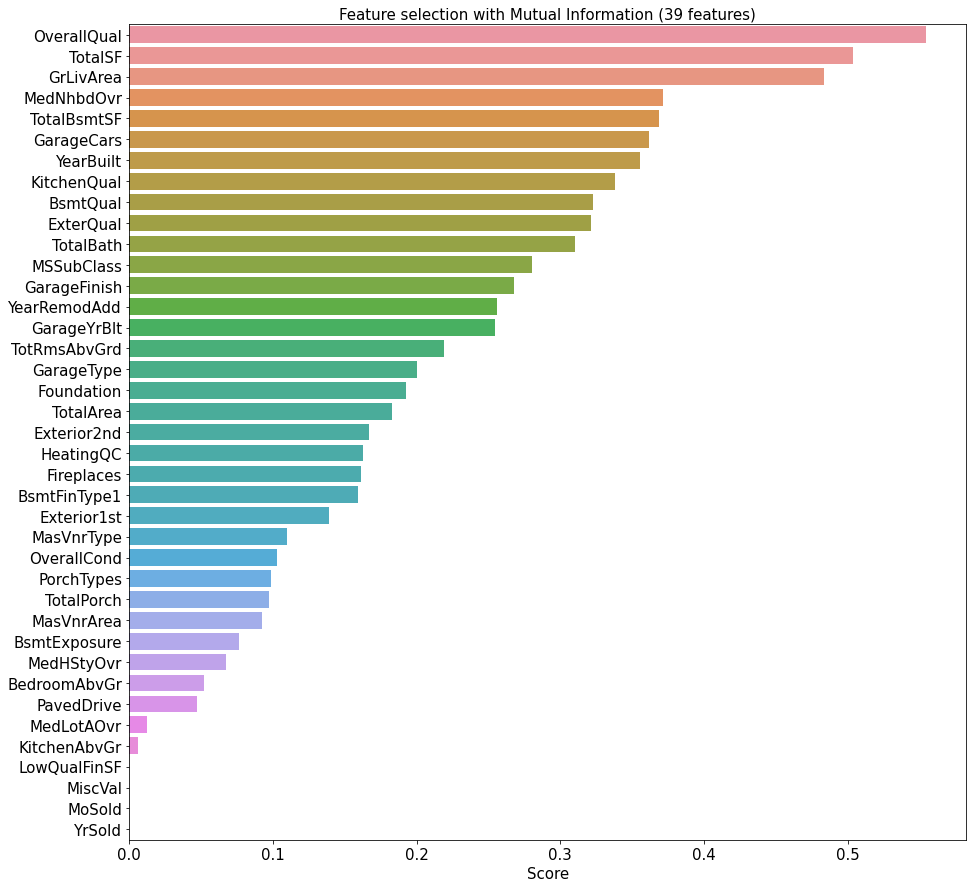

In [66]:
# Gráfico padronizado de fig
fig = sns.barplot(x = df_fs1['score'].values, y = df_fs1['feature'].values)
fig.figure.set_size_inches(15, 15)
fig.tick_params(labelsize = 15)
fig.set_xlabel('Score', fontsize = 15)
fig.set_title(f'Feature selection with Mutual Information ({df_fs1.shape[0]} features)', fontsize = 15);

## 4.2 F Regression

In [67]:
X_train_fs2, X_test_fs2, df_fs2, fs2 = get_feature_selection(X_train, y_train, X_test, f_regression, 'all')

df_fs2

,feature,score
18,OverallQual,2405.429051
32,TotalSF,1868.282263
23,GrLivArea,1584.991680
0,ExterQual,1266.681617
36,MedNhbdOvr,1166.179320
5,KitchenQual,1097.419568
15,YearBuilt,1097.188526
21,TotalBsmtSF,1028.087765
29,GarageCars,987.079864
34,TotalBath,865.494122


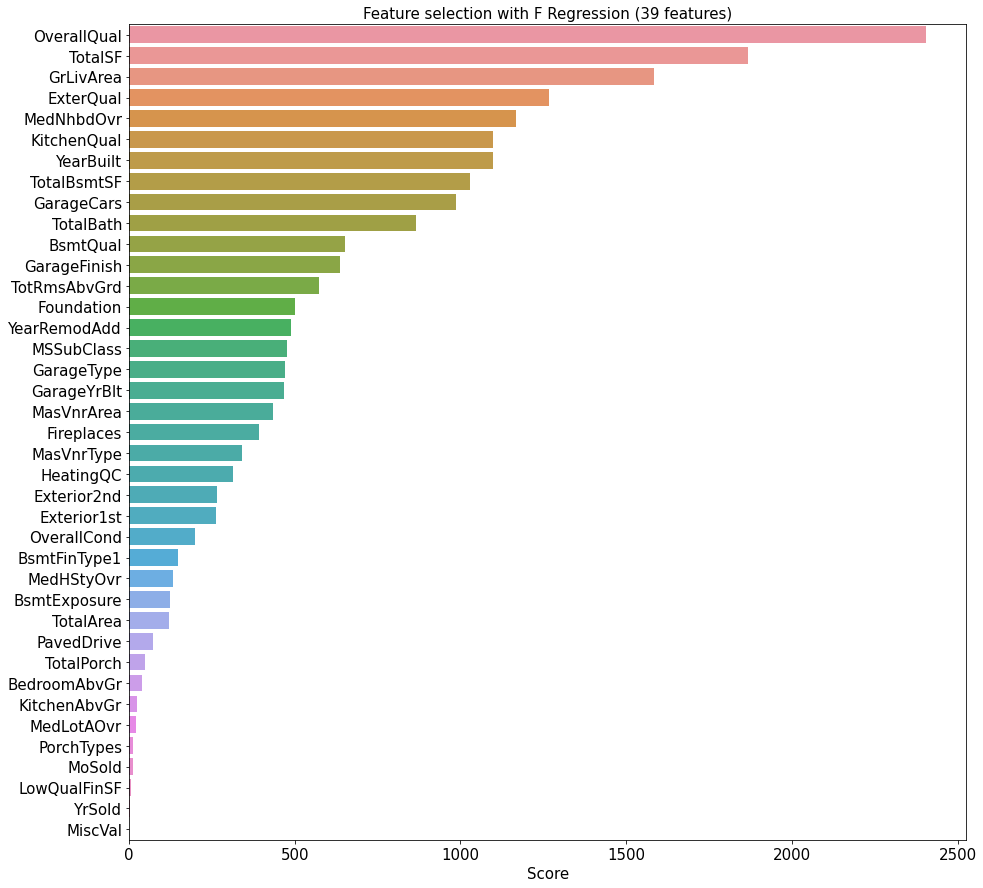

In [68]:
# Gráfico padronizado de fig
fig = sns.barplot(x = df_fs2['score'].values, y = df_fs2['feature'].values)
fig.figure.set_size_inches(15, 15)
fig.tick_params(labelsize = 15)
fig.set_xlabel('Score', fontsize = 15)
fig.set_title(f'Feature selection with F Regression ({df_fs2.shape[0]} features)', fontsize = 15);

## 4.3 Create a Pipeline

In [69]:
transformer_fs_mic  = Pipeline( steps = [('preprocessor', preprocessor),
                                         ('feature_selection_mic', SelectKBest(score_func = mutual_info_regression, k = 33))])

transformer_fs_freg = Pipeline( steps = [('preprocessor', preprocessor),
                                         ('feature_selection_freg', SelectKBest(score_func = f_regression, k = 33))])

# 5 - Evaluating
**Algorithms based on linear models**

In [70]:
# Imports
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures

In [71]:
clf_l2_fs1 = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ("classifier", Ridge(alpha=15))]
)

clf_l2_fs2 = Pipeline(
    steps=[("preprocessor", transformer_fs_freg), ("classifier", Ridge(alpha=15))]
)

clf_l1_fs1 = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ("classifier", Lasso(alpha=15))]
)

clf_l1_fs2 = Pipeline(
    steps=[("preprocessor", transformer_fs_freg), ("classifier", Lasso(alpha=15))]
)

clf_lin_fs1 = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ("classifier", LinearRegression())]
)

clf_lin_fs2 = Pipeline(
    steps=[("preprocessor", transformer_fs_freg), ("classifier", LinearRegression())]
)

clf_enet_fs1 = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ("classifier", ElasticNet(l1_ratio=0.9, alpha=0.0005))]
)

clf_enet_fs2 = Pipeline(
    steps=[("preprocessor", transformer_fs_freg), ("classifier", ElasticNet(l1_ratio=0.9, alpha=0.0005))]
)

clf_poly_fs1 = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ('polynomial', PolynomialFeatures(degree = 2)), ("classifier", Lasso(alpha=15))]
)

clf_poly_fs2 = Pipeline(
    steps=[("preprocessor", transformer_fs_freg), ('polynomial', PolynomialFeatures(degree = 2)), ("classifier", Lasso(alpha=15))]
)

clf_kridge_fs1 = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ("classifier", KernelRidge(degree = 2, kernel = 'polynomial', coef0=1, alpha = 0.0005))]
)

clf_kridge_fs2 = Pipeline(
    steps=[("preprocessor", transformer_fs_freg), ("classifier", KernelRidge(degree = 2, kernel = 'polynomial', coef0=1, alpha = 0.0005))]
)

In [72]:
cv    = RepeatedKFold(n_splits = 10, n_repeats = 30, random_state = 14)

In [73]:
df, df_test = get_df()
X_train, X_test, y_train = get_train_test_split(df, df_test)
X_train.shape, X_test.shape

((1441, 39), (1459, 39))

## 5.1 - Ridge Regression

In [ ]:
score_l2_fs1 = cross_val_score(clf_l2_fs1, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
score_l2_fs2 = cross_val_score(clf_l2_fs2, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

In [75]:
print(f'=== MUTUAL INFORMATION - FEATURE SELECTION ===\nMean RMSE: {round(score_l2_fs1.mean(), 2)} | STD: {round(score_l2_fs1.std(), 2)} | VAR: {round(score_l2_fs1.var(), 2)}\n')
print(f'=== F REGRESSION - FEATURE SELECTION ===\nMean RMSE: {round(score_l2_fs2.mean(), 2)} | STD: {round(score_l2_fs2.std(), 2)} | VAR: {round(score_l2_fs2.var(), 2)}')

=== MUTUAL INFORMATION - FEATURE SELECTION ===
Mean RMSE: -32556.84 | STD: 5819.07 | VAR: 33861534.61

=== F REGRESSION - FEATURE SELECTION ===
Mean RMSE: -32531.93 | STD: 5829.17 | VAR: 33979279.15


## 5.2 Lasso Regression

In [ ]:
score_l1_fs1 = cross_val_score(clf_l1_fs1, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
score_l1_fs2 = cross_val_score(clf_l1_fs2, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

In [77]:
print(f'=== MUTUAL INFORMATION - FEATURE SELECTION ===\nMean RMSE: {round(score_l1_fs1.mean(), 2)} | STD: {round(score_l1_fs1.std(), 2)} | VAR: {round(score_l1_fs1.var(), 2)}\n')
print(f'=== F REGRESSION - FEATURE SELECTION ===\nMean RMSE: {round(score_l1_fs2.mean(), 2)} | STD: {round(score_l1_fs2.std(), 2)} | VAR: {round(score_l1_fs2.var(), 2)}')

=== MUTUAL INFORMATION - FEATURE SELECTION ===
Mean RMSE: -31400.9 | STD: 5952.69 | VAR: 35434500.91

=== F REGRESSION - FEATURE SELECTION ===
Mean RMSE: -31288.7 | STD: 6019.74 | VAR: 36237257.91


## 5.3 Linear Regression

In [ ]:
score_lin_fs1 = cross_val_score(clf_lin_fs1, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
score_lin_fs2 = cross_val_score(clf_lin_fs2, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

In [79]:
print(f'=== MUTUAL INFORMATION - FEATURE SELECTION ===\nMean RMSE: {round(score_lin_fs1.mean(), 2)} | STD: {round(score_lin_fs1.std(), 2)} | VAR: {round(score_lin_fs1.var(), 2)}\n')
print(f'=== F REGRESSION - FEATURE SELECTION ===\nMean RMSE: {round(score_lin_fs2.mean(), 2)} | STD: {round(score_lin_fs2.std(), 2)} | VAR: {round(score_lin_fs2.var(), 2)}')

=== MUTUAL INFORMATION - FEATURE SELECTION ===
Mean RMSE: -31442.33 | STD: 5955.17 | VAR: 35464096.02

=== F REGRESSION - FEATURE SELECTION ===
Mean RMSE: -31333.22 | STD: 6031.89 | VAR: 36383706.9


## 5.4 ElasticNet Regression

In [ ]:
score_enet_fs1 = cross_val_score(clf_enet_fs1, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
score_enet_fs2 = cross_val_score(clf_enet_fs2, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

In [81]:
print(f'=== MUTUAL INFORMATION - FEATURE SELECTION ===\nMean RMSE: {round(score_enet_fs1.mean(), 2)} | STD: {round(score_enet_fs1.std(), 2)} | VAR: {round(score_enet_fs1.var(), 2)}\n')
print(f'=== F REGRESSION - FEATURE SELECTION ===\nMean RMSE: {round(score_enet_fs2.mean(), 2)} | STD: {round(score_enet_fs2.std(), 2)} | VAR: {round(score_enet_fs2.var(), 2)}')

=== MUTUAL INFORMATION - FEATURE SELECTION ===
Mean RMSE: -31420.41 | STD: 5947.54 | VAR: 35373213.46

=== F REGRESSION - FEATURE SELECTION ===
Mean RMSE: -31318.62 | STD: 6019.74 | VAR: 36237224.71


## 5.5 Polynomial Regression

In [ ]:
score_poly_fs1 = cross_val_score(clf_poly_fs1, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
score_poly_fs2 = cross_val_score(clf_poly_fs2, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

In [83]:
print(f'=== MUTUAL INFORMATION - FEATURE SELECTION ===\nMean RMSE: {round(score_poly_fs1.mean(), 2)} | STD: {round(score_poly_fs1.std(), 2)} | VAR: {round(score_poly_fs1.var(), 2)}\n')
print(f'=== F REGRESSION - FEATURE SELECTION ===\nMean RMSE: {round(score_poly_fs2.mean(), 2)} | STD: {round(score_poly_fs2.std(), 2)} | VAR: {round(score_poly_fs2.var(), 2)}')

=== MUTUAL INFORMATION - FEATURE SELECTION ===
Mean RMSE: -26045.91 | STD: 8988.36 | VAR: 80790659.74

=== F REGRESSION - FEATURE SELECTION ===
Mean RMSE: -26162.06 | STD: 9229.86 | VAR: 85190319.9


## 5.6 Kernel Ridge

In [ ]:
score_kr_fs1 = cross_val_score(clf_kridge_fs1, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
score_kr_fs2 = cross_val_score(clf_kridge_fs2, X_train, y_train, cv=cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

In [85]:
print(f'=== MUTUAL INFORMATION - FEATURE SELECTION ===\nMean RMSE: {round(score_kr_fs1.mean(), 2)} | STD: {round(score_kr_fs1.std(), 2)} | VAR: {round(score_kr_fs1.var(), 2)}\n')
print(f'=== F REGRESSION - FEATURE SELECTION ===\nMean RMSE: {round(score_kr_fs2.mean(), 2)} | STD: {round(score_kr_fs2.std(), 2)} | VAR: {round(score_kr_fs2.var(), 2)}')

=== MUTUAL INFORMATION - FEATURE SELECTION ===
Mean RMSE: -27607.97 | STD: 10330.83 | VAR: 106726102.67

=== F REGRESSION - FEATURE SELECTION ===
Mean RMSE: -27751.39 | STD: 10544.54 | VAR: 111187392.9


# 7 - GridsearchCV

In [102]:
from sklearn.model_selection import GridSearchCV

clf_poly_gsCV = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ('polynomial', PolynomialFeatures(degree = 2)), ("classifier", Lasso())]
) # classifier__alpha

clf_kridge_gsCV = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ("classifier", KernelRidge(degree = 2, kernel = 'polynomial'))]
) # classifier__coef0 :: classifier__alpha

In [103]:
param_poly = {
    'classifier__alpha': [12, 16, 20, 24, 28, 30]
}

param_kridge = {
    'classifier__coef0': [0, 1, 2, 3, 4, 5]
  , 'classifier__alpha': [.00005, .0005, .005, .05, .5, 1, 2, 3]
}

In [ ]:
gridsearch_poly = GridSearchCV(clf_poly_gsCV, param_grid = param_poly, n_jobs = -1, scoring = 'neg_root_mean_squared_error', cv = cv)
gridsearch_poly.fit(X_train, y_train);

In [105]:
results_poly = gridsearch_poly.cv_results_
results_poly = pd.DataFrame(data = results_poly, columns = results_poly.keys())
results_poly.sort_values(by = ['rank_test_score'] , inplace = True)
results_poly.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,split50_test_score,split51_test_score,split52_test_score,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,split60_test_score,split61_test_score,split62_test_score,split63_test_score,split64_test_score,split65_test_score,split66_test_score,split67_test_score,split68_test_score,split69_test_score,split70_test_score,split71_test_score,split72_test_score,split73_test_score,split74_test_score,split75_test_score,split76_test_score,split77_test_score,split78_test_score,split79_test_score,split80_test_score,split81_test_score,split82_test_score,split83_test_score,split84_test_score,split85_test_score,split86_test_score,split87_test_score,split88_test_score,split89_test_score,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,split100_test_score,split101_test_score,split102_test_score,split103_test_score,split104_test_score,split105_test_score,split106_test_score,split107_test_score,split108_test_score,split109_test_score,split110_test_score,split111_test_score,split112_test_score,split113_test_score,split114_test_score,split115_test_score,split116_test_score,split117_test_score,split118_test_score,split119_test_score,split120_test_score,split121_test_score,split122_test_score,split123_test_score,split124_test_score,split125_test_score,split126_test_score,split127_test_score,split128_test_score,split129_test_score,split130_test_score,split131_test_score,split132_test_score,split133_test_score,split134_test_score,split135_test_score,split136_test_score,split137_test_score,split138_test_score,split139_test_score,split140_test_score,split141_test_score,split142_test_score,split143_test_score,split144_test_score,split145_test_score,split146_test_score,split147_test_score,split148_test_score,split149_test_score,split150_test_score,split151_test_score,split152_test_score,split153_test_score,split154_test_score,split155_test_score,split156_test_score,split157_test_score,split158_test_score,split159_test_score,split160_test_score,split161_test_score,split162_test_score,split163_test_score,split164_test_score,split165_test_score,split166_test_score,split167_test_score,split168_test_score,split169_test_score,split170_test_score,split171_test_score,split172_test_score,split173_test_score,split174_test_score,split175_test_score,split176_test_score,split177_test_score,split178_test_score,split179_test_score,split180_test_score,split181_test_score,split182_test_score,split183_test_score,split184_test_score,split185_test_score,split186_test_score,split187_test_score,split188_test_score,split189_test_score,split190_test_score,split191_test_score,split192_test_score,split193_test_score,split194_test_score,split195_test_score,split196_test_score,split197_test_score,split198_test_score,split199_test_score,split200_test_score,

In [ ]:
gridsearch_kridge = GridSearchCV(clf_kridge_gsCV, param_grid = param_kridge, n_jobs = -1, scoring = 'neg_root_mean_squared_error', cv = cv)
gridsearch_kridge.fit(X_train, y_train);

In [107]:
results_kridge = gridsearch_kridge.cv_results_
results_kridge = pd.DataFrame(data = results_kridge, columns = results_kridge.keys())
results_kridge.sort_values(by = ['rank_test_score'] , inplace = True)
results_kridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,param_classifier__coef0,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,split50_test_score,split51_test_score,split52_test_score,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,split60_test_score,split61_test_score,split62_test_score,split63_test_score,split64_test_score,split65_test_score,split66_test_score,split67_test_score,split68_test_score,split69_test_score,split70_test_score,split71_test_score,split72_test_score,split73_test_score,split74_test_score,split75_test_score,split76_test_score,split77_test_score,split78_test_score,split79_test_score,split80_test_score,split81_test_score,split82_test_score,split83_test_score,split84_test_score,split85_test_score,split86_test_score,split87_test_score,split88_test_score,split89_test_score,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,split100_test_score,split101_test_score,split102_test_score,split103_test_score,split104_test_score,split105_test_score,split106_test_score,split107_test_score,split108_test_score,split109_test_score,split110_test_score,split111_test_score,split112_test_score,split113_test_score,split114_test_score,split115_test_score,split116_test_score,split117_test_score,split118_test_score,split119_test_score,split120_test_score,split121_test_score,split122_test_score,split123_test_score,split124_test_score,split125_test_score,split126_test_score,split127_test_score,split128_test_score,split129_test_score,split130_test_score,split131_test_score,split132_test_score,split133_test_score,split134_test_score,split135_test_score,split136_test_score,split137_test_score,split138_test_score,split139_test_score,split140_test_score,split141_test_score,split142_test_score,split143_test_score,split144_test_score,split145_test_score,split146_test_score,split147_test_score,split148_test_score,split149_test_score,split150_test_score,split151_test_score,split152_test_score,split153_test_score,split154_test_score,split155_test_score,split156_test_score,split157_test_score,split158_test_score,split159_test_score,split160_test_score,split161_test_score,split162_test_score,split163_test_score,split164_test_score,split165_test_score,split166_test_score,split167_test_score,split168_test_score,split169_test_score,split170_test_score,split171_test_score,split172_test_score,split173_test_score,split174_test_score,split175_test_score,split176_test_score,split177_test_score,split178_test_score,split179_test_score,split180_test_score,split181_test_score,split182_test_score,split183_test_score,split184_test_score,split185_test_score,split186_test_score,split187_test_score,split188_test_score,split189_test_score,split190_test_score,split191_test_score,split192_test_score,split193_test_score,split194_test_score,split195_test_score,split196_test_score,split197_test_score,split198_test_score,split199_test_sc

# 6 - Best rated model (Polynomial Regression with Mutual Information Feature Selection)

In [114]:
df, df_test = get_df()
X_train, X_test, y_train = get_train_test_split(df, df_test)

In [115]:
clf = Pipeline(
    steps=[("preprocessor", transformer_fs_mic), ('polynomial', PolynomialFeatures(degree = 2)), ("classifier", Lasso(alpha = 30))]
)

In [116]:
%%time
model_poly = clf.fit(X_train, y_train)

[ColumnTransformer] ........... (1 of 3) Processing ord, total=   0.0s
[ColumnTransformer] ........... (2 of 3) Processing nom, total=   0.2s
[ColumnTransformer] ........... (3 of 3) Processing num, total=   0.0s
[ColumnTransformer] .......... (1 of 1) Processing impt, total=   0.0s
[ColumnTransformer] ....... (1 of 2) Processing nom-num, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
CPU times: user 1.34 s, sys: 457 ms, total: 1.79 s
Wall time: 1.08 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+10, tolerance: 8.975e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [117]:
y_pred = model_poly.predict(X_test)

In [118]:
df_pred = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})
df_pred.head(10)

,Id,SalePrice
0,1461,122202.803747
1,1462,142207.969236
2,1463,172571.780599
3,1464,193557.174237
4,1465,183362.223390
5,1466,168117.888834
6,1467,188126.230705
7,1468,157560.277622
8,1469,203674.659307
9,1470,124515.380504


In [119]:
df_pred.to_csv('submission.csv', index = False)
print('OK')

OK
